### Standardize, clean and wrangle Water Quality Portal data in Cape Cod into more analytic-ready formats using the harmonize_wq package

US EPA’s Water Quality Portal (WQP) aggregates water quality, biological, and physical data provided by many organizations and has become an essential resource with tools to query and retrieval data using python or R. Given the variety of data and variety of data originators, using the data in analysis often requires data cleaning to ensure it meets the required quality standards and data wrangling to get it in a more analytic-ready format. Recognizing the definition of analysis-ready varies depending on the analysis, the harmonixe_wq package is intended to be a flexible water quality specific framework to help:
- Identify differences in data units (including speciation and basis)
- Identify differences in sampling or analytic methods
- Resolve data errors using transparent assumptions
- Reduce data to the columns that are most commonly needed
- Transform data from long to wide format

Domain experts must decide what data meets their quality standards for data comparability and any thresholds for acceptance or rejection.

### Detailed step-by-step workflow

This example workflow takes a deeper dive into some of the expanded functionality to examine results for different water quality parameters in Cape Cod

#### Install and import the required libraries

In [1]:
import sys
#!python -m pip uninstall harmonize-wq --yes
# Use pip to install the package from pypi or the latest from github
#!{sys.executable} -m pip install harmonize-wq
# For latest dev version
!{sys.executable} -m pip install git+https://github.com/USEPA/harmonize-wq.git

  Cloning https://github.com/USEPA/harmonize-wq.git to c:\users\jbousqui\appdata\local\temp\pip-req-build-qzflsmdw
  Resolved https://github.com/USEPA/harmonize-wq.git to commit 5d0e426f9388bc75fa395d2b7475363979d6c2db
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/USEPA/harmonize-wq.git 'C:\Users\jbousqui\AppData\Local\Temp\pip-req-build-qzflsmdw'


In [2]:
import dataretrieval.wqp as wqp
from harmonize_wq import wrangle
from harmonize_wq import location
from harmonize_wq import harmonize
from harmonize_wq import visualize
from harmonize_wq import clean

#### Download location data using dataretrieval

<Axes: >

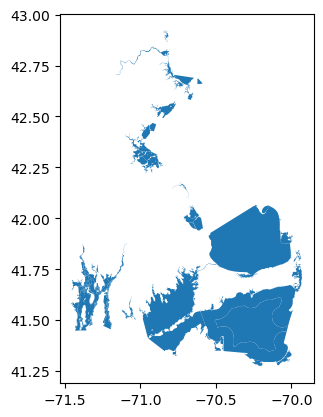

In [3]:
# Read geometry for Area of Interest from geojson file url and plot
aoi_url = 'https://github.com/jbousquin/test_notebook/raw/main/temperature_data/NewEngland.geojson'
aoi_gdf = wrangle.as_gdf(aoi_url)  # Already 4326 standard
aoi_gdf.plot()

In [4]:
# Build query with characteristicNames and the AOI extent
query = {'characteristicName': ['Phosphorus',
                                'Temperature, water',
                                'Depth, Secchi disk depth',
                                'Dissolved oxygen (DO)',
                                'Salinity',
                                'pH',
                                'Nitrogen',
                                'Conductivity',
                                'Organic carbon',
                                'Chlorophyll a',
                                'Turbidity',
                                'Sediment',
                                'Fecal Coliform',
                                'Escherichia coli']}
query['bBox'] = wrangle.get_bounding_box(aoi_gdf)

In [5]:
# Query stations (can be slow)
stations, site_md = wqp.what_sites(**query)

In [6]:
# Rows and columns for results
stations.shape

(7812, 37)

In [7]:
# First 5 rows
stations.head()

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-MA,USGS Massachusetts Water Science Center,USGS-010965305,MERRIMACK R NR TYNGSBOROUGH BRIDGE TYNGSBOROUG...,Stream,NaN,1070006.0,4070.00,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-MA,USGS Massachusetts Water Science Center,USGS-01096544,"STONY BROOK AT SCHOOL STREET AT CHELMSFORD, MA",Stream,NaN,1070006.0,41.57,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-MA,USGS Massachusetts Water Science Center,USGS-01096546,"STONY BROOK AT CHELMSFORD, MA",Stream,NaN,1070006.0,43.60,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-MA,USGS Massachusetts Water Science Center,USGS-01096548,"STONY BROOK AT N CHELMSFORD, MA",Stream,NaN,1070006.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-MA,USGS Massachusetts Water Science Center,USGS-01096550,"MERRIMACK RIVER ABOVE LOWELL, MA",Stream,NaN,1070006.0,3900.00,sq mi,3900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


In [8]:
# Columns used for an example row
stations.iloc[0][['HorizontalCoordinateReferenceSystemDatumName', 'LatitudeMeasure', 'LongitudeMeasure']]

HorizontalCoordinateReferenceSystemDatumName        NAD83
LatitudeMeasure                                 42.677389
LongitudeMeasure                               -71.421056
Name: 0, dtype: object

In [9]:
# Harmonize location datums to 4326 (Note we keep intermediate columns using intermediate_columns=True)
stations_gdf = location.harmonize_locations(stations, outEPSG=4326, intermediate_columns=True)

In [10]:
# Every function has a dostring to help understand input/output and what it does
location.harmonize_locations?

Signature:
location.harmonize_locations(
    df_in,
    out_EPSG=4326,
    intermediate_columns=False,
    **kwargs,
)
Docstring:
Takes a DataFrame with lat/lon in multiple Coordinate Reference Systems,
transforms them to outCRS and converts to GeoDataFrame

Parameters
----------
df_in : pandas.DataFrame
    DataFrame with the required columns to be converted to GeoDataFrame.
out_EPSG : Integer, optional
    EPSG factory code for desired output Coordinate Reference System datum.
    The default is 4326, for the WGS84 Datum used by WQP queries.
intermediate_columns : Boolean, optional
    Return intermediate columns. Default 'False' does not return these.
Keyword Arguments:
crs_col : string, optional
    Name of column in DataFrame with the Coordinate Reference System datum.
    The default is 'HorizontalCoordinateReferenceSystemDatumName'.
lat_col : string, optional
    Name of column in DataFrame with the latitude coordinate.
    The default is 'LatitudeMeasure'.
lon_col : string, opt

In [11]:
# Rows and columns for results after running the function (5 new columns, only 2 new if intermediate_columns=False)
stations_gdf.shape

(7812, 42)

In [12]:
# Example results for the new columns
stations_gdf.iloc[0][['geom_orig', 'EPSG', 'QA_flag', 'geom', 'geometry']]

geom_orig         (-71.4210556, 42.67738889)
EPSG                                  4269.0
QA_flag                                  NaN
geom         POINT (-71.4210556 42.67738889)
geometry     POINT (-71.4210556 42.67738889)
Name: 0, dtype: object

In [13]:
# geom and geometry look the same but geometry is a special datatype
stations_gdf['geometry'].dtype

In [14]:
# Look at the different QA_flag flags that have been assigned,
# e.g., for bad datums or limited decimal precision
set(stations_gdf.loc[stations_gdf['QA_flag'].notna()]['QA_flag'])

{'HorizontalCoordinateReferenceSystemDatumName: Bad datum OTHER, EPSG:4326 assumed',
 'HorizontalCoordinateReferenceSystemDatumName: Bad datum UNKWN, EPSG:4326 assumed',
 'LatitudeMeasure: Imprecise: lessthan3decimaldigits',
 'LatitudeMeasure: Imprecise: lessthan3decimaldigits; HorizontalCoordinateReferenceSystemDatumName: Bad datum UNKWN, EPSG:4326 assumed',
 'LatitudeMeasure: Imprecise: lessthan3decimaldigits; LongitudeMeasure: Imprecise: lessthan3decimaldigits',
 'LatitudeMeasure: Imprecise: lessthan3decimaldigits; LongitudeMeasure: Imprecise: lessthan3decimaldigits; HorizontalCoordinateReferenceSystemDatumName: Bad datum UNKWN, EPSG:4326 assumed',
 'LongitudeMeasure: Imprecise: lessthan3decimaldigits',
 'LongitudeMeasure: Imprecise: lessthan3decimaldigits; HorizontalCoordinateReferenceSystemDatumName: Bad datum UNKWN, EPSG:4326 assumed'}

<Axes: >

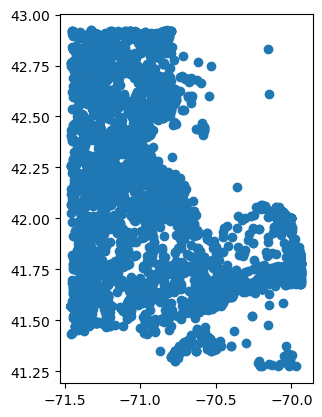

In [15]:
# Map it
stations_gdf.plot()

In [16]:
# Clip to area of interest
stations_clipped = wrangle.clip_stations(stations_gdf, aoi_gdf)

<Axes: >

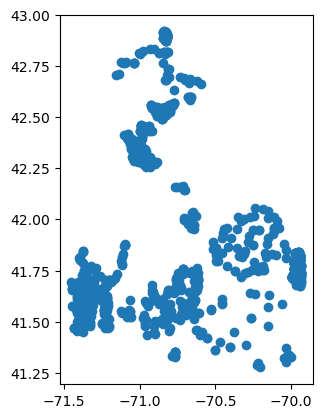

In [17]:
# Map it
stations_clipped.plot()

In [18]:
# How many stations now?
len(stations_clipped)

1313

In [19]:
# To save the results to a shapefile
#import os
#path = ''  #specify the path (folder/directory) to save it to
#stations_clipped.to_file(os.path.join(path,'CapeCod_stations.shp'))

#### Retrieve Characteristic Data

In [20]:
# Now query for results
query['dataProfile'] = 'narrowResult'
res_narrow, md_narrow = wqp.get_results(**query)

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\dataretrieval\wqp.py:83: DtypeWarning: Columns (8,10,13,15,17,19,20,21,22,23,28,31,32,33,34,36,38,60,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=',')


In [21]:
df = res_narrow
df

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,CRWA,Charles River Watershed Association (Massachus...,CRWA-CYN20130809ROBTemp01,2013-08-09,11:14:33,EST,CRWA-ROB,STORET-591631481,130809111433.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-CACO_HX30_21_7/22/2013_SFW_0.01,2013-07-22,11:01:00,EDT,11NPSWRD_WQX-CACO_HX30_21,STORET-986369728,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,MASSDEP,Massachusetts Department of Environmental Prot...,MASSDEP-LB-5142,2013-07-30,14:20:00,EDT,MASSDEP-W2173,STORET-762955917,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
3,IRWA,Ipswich River Watershed Association (Volunteer),IRWA-HB:20130630120000:FM,2013-06-30,12:00:00,EDT,IRWA-HB,STORET-853064665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,CRWA,Charles River Watershed Association (Massachus...,CRWA-VMM20131217609SEC02,2013-12-17,07:40:00,EST,CRWA-609S,STORET-872379847,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334687,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334688,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334689,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708077,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


<Axes: >

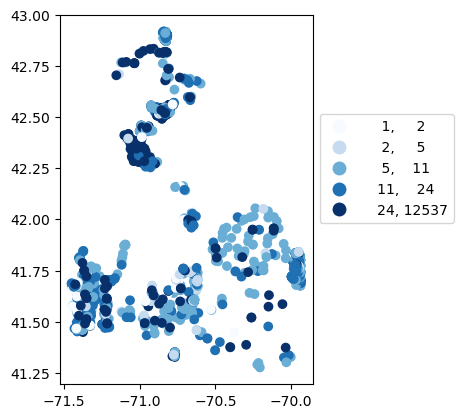

In [22]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(df, stations_clipped)
legend_kwds = {"fmt": "{:.0f}", 'bbox_to_anchor':(1, 0.75)}
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

#### Harmonize Characteristic Results

Two options for functions to harmonize characteristics: harmonize_all() or harmonize_generic().
harmonize_all runs functions on all characteristics and lets you specify how to handle errors
harmonize_generic runs functions only on the characteristic specified with char_val and lets you also
choose output units, to keep intermediate columns and to do a quick report summarizing changes.

In [23]:
# See Documentation
#harmonize_WQP.harmonize_all?
#harmonize_WQP.harmonize_generic?

##### secchi disk depth

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'None' UNDEFINED UNIT for Secchi
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


-Usable results-
count    4721.000000
mean      -12.805823
std       411.484889
min     -9999.000000
25%         1.700000
50%         3.500000
75%         6.100000
max        17.000000
dtype: float64
Unusable results: 264
Usable results with inferred units: 0
Results outside threshold (0.0 to 2456.103509280026): 16


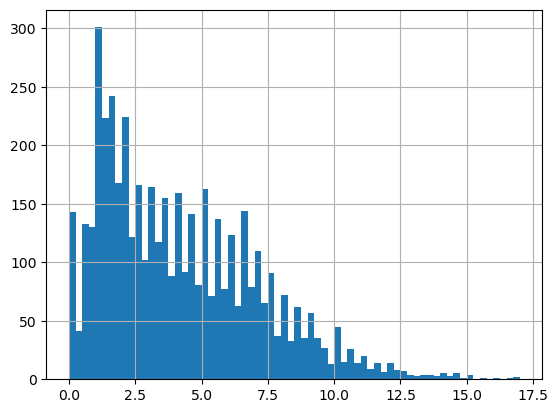

In [24]:
# Each harmonize function has optional params, e.g., char_val is the characticName column value to use so we can send the entire df.
# Optional params: units='m', char_val='Depth, Secchi disk depth', out_col='Secchi', report=False)

# We start by demonstrating on secchi disk depth (units default to m, keep intermediate fields, see report)
df = harmonize.harmonize_generic(df, 'Depth, Secchi disk depth', intermediate_columns=True, report=True)

The threshold is based on standard deviations and is currently only used in the histogram.

In [25]:
# Look at a table of just Secchi results and focus on subset of columns
cols = ['MonitoringLocationIdentifier', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Units']
sechi_results = df.loc[df['CharacteristicName']=='Depth, Secchi disk depth', cols + ['Secchi']]
sechi_results

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Units,Secchi
17,11113300-GRTKINSD,3.25,m,NaN,m,3.25 meter
135,11113300-BEADERD,4.25,m,NaN,m,4.25 meter
302,11113300-ANGSDND,3.5,m,NaN,m,3.5 meter
326,NALMS-F612242,2,m,NaN,m,2.0 meter
565,11113300-GRTKINSD,2.25,m,NaN,m,2.25 meter
...,...,...,...,...,...,...
334073,11NPSWRD_WQX-CACO_DUCK_W,16.5,m,NaN,m,16.5 meter
334074,11NPSWRD_WQX-CACO_DUCK_W,10.0,m,NaN,m,10.0 meter
334075,11NPSWRD_WQX-CACO_DUCK_W,17.0,m,NaN,m,17.0 meter
334076,11NPSWRD_WQX-CACO_DUCK_W,16.0,m,NaN,m,16.0 meter


In [26]:
# Look at unusable(NAN) results
sechi_results.loc[df['Secchi'].isna()]

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Units,Secchi
10187,NARS_WQX-NLA12_MA-102,NaN,NaN,ResultMeasureValue: missing (NaN) result; Resu...,m,NaN
28771,EPA_OCMA_R1-SS-2,dark,m,"ResultMeasureValue: ""dark"" result cannot be used",m,NaN
31573,EPA_OCMA_R1-SS-3,dark,m,"ResultMeasureValue: ""dark"" result cannot be used",m,NaN
33513,EPA_OCMA_R1-R1-23,dark,m,"ResultMeasureValue: ""dark"" result cannot be used",m,NaN
35707,EPA_OCMA_R1-R1-25,dark,m,"ResultMeasureValue: ""dark"" result cannot be used",m,NaN
...,...,...,...,...,...,...
254395,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
254445,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
254682,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
255191,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN


In [27]:
# look at the QA flag for first row from above
list(sechi_results.loc[df['Secchi'].isna()]['QA_flag'])[0]

'ResultMeasureValue: missing (NaN) result; ResultMeasure/MeasureUnitCode: MISSING UNITS, m assumed'

In [28]:
# All cases where there was a QA flag
sechi_results.loc[df['QA_flag'].notna()]

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Units,Secchi
10187,NARS_WQX-NLA12_MA-102,NaN,NaN,ResultMeasureValue: missing (NaN) result; Resu...,m,NaN
28737,NARS_WQX-NCCA10-1070,-9,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,m,-9.0 meter
28771,EPA_OCMA_R1-SS-2,dark,m,"ResultMeasureValue: ""dark"" result cannot be used",m,NaN
28910,NARS_WQX-NCCA10-1029,-9,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,m,-9.0 meter
30092,NARS_WQX-NCCA10-1001,-9,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,m,-9.0 meter
...,...,...,...,...,...,...
254395,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
254445,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
254682,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN
255191,11NPSWRD_WQX-CACO_GREAT_W,NaN,m,ResultMeasureValue: missing (NaN) result,m,NaN


If both value and unit are missing nothing can be done, a unitless (NaN) value is assumed as to be in default units but a QA_flag is added

In [29]:
# Aggregate secchi data by station
visualize.station_summary(sechi_results, 'Secchi')

,MonitoringLocationIdentifier,cnt,mean
0,11113300-ANGSDND,42,3.796369
1,11113300-BEADERD,42,3.644048
2,11113300-CANWIND,22,6.144000
3,11113300-CAPSALD,24,2.456262
4,11113300-COBWINND,21,3.768810
...,...,...,...
669,NARS_WQX-NLA_MA-10030,1,0.950000
670,NARS_WQX-NLA_MA-10032,1,3.150000
671,NARS_WQX-NLA_RI-10051,1,1.965000
672,NARS_WQX-NLA_RI-10062,1,2.540000


C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


<Axes: >

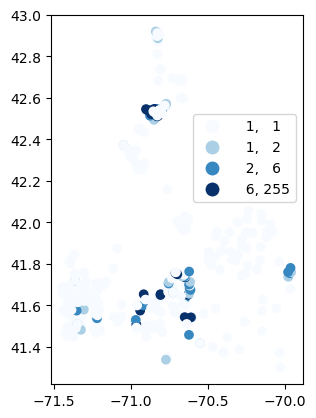

In [30]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(sechi_results, stations_clipped)
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

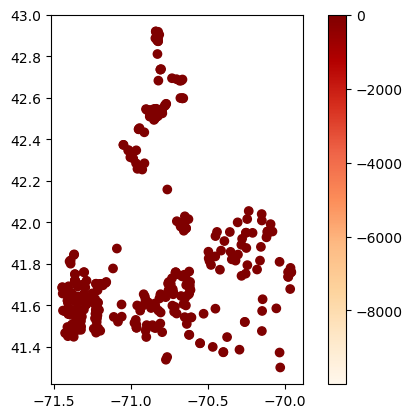

In [31]:
# Map average results at each station
gdf_avg = visualize.map_measure(sechi_results, stations_clipped, 'Secchi')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)

##### Temperature

The default error='raise', makes it so that there is an error when there is a dimensionality error (i.e. when units can't be converted). Here we would get the error: DimensionalityError: Cannot convert from 'count' (dimensionless) to 'degree_Celsius' ([temperature])

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'count' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))


-Usable results-
count    95309.000000
mean        15.488230
std          7.691245
min         -6.000000
25%         10.200000
50%         15.780000
75%         21.500000
max        910.000000
dtype: float64
Unusable results: 213
Usable results with inferred units: 217
Results outside threshold (0.0 to 61.63570005958812): 115


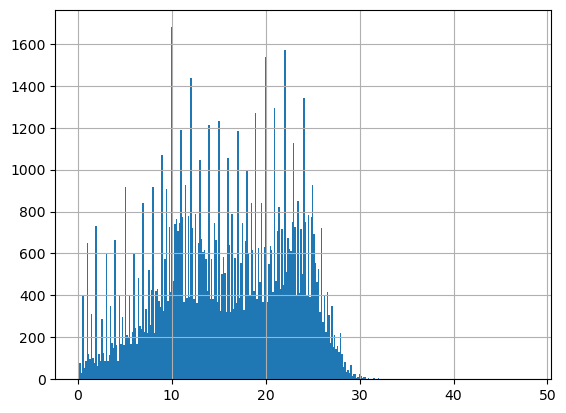

In [32]:
#'Temperature, water'
# errors=‘ignore’, invalid dimension conversions will return the NaN.
df = harmonize.harmonize_generic(df, 'Temperature, water', intermediate_columns=True, report=True, errors='ignore')

In [33]:
# Look at what was changed
cols = ['MonitoringLocationIdentifier', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Temperature', 'Units']
temperature_results = df.loc[df['CharacteristicName']=='Temperature, water', cols]
temperature_results

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Temperature,Units
0,CRWA-ROB,23.01,deg C,NaN,23.01 degree_Celsius,degC
8,CRWA-635S,5.5,deg C,NaN,5.5 degree_Celsius,degC
15,CRWA-4LONG,28.2,deg C,NaN,28.2 degree_Celsius,degC
25,11113300-BCHHSPHAMLF,15,deg C,NaN,15.0 degree_Celsius,degC
28,MASSDEP-W0762,23.7,deg C,NaN,23.7 degree_Celsius,degC
...,...,...,...,...,...,...
334666,USGS-01099500,21.8,deg C,NaN,21.8 degree_Celsius,degC
334673,USGS-01098530,22.5,deg C,NaN,22.5 degree_Celsius,degC
334676,USGS-01100845,25.5,deg C,NaN,25.5 degree_Celsius,degC
334681,USGS-01113895,25.1,deg C,NaN,25.1 degree_Celsius,degC


In the above we can see examples where the results were in deg F and in the result field they've been converted into degree_Celsius

In [34]:
# Examine missing units
temperature_results.loc[df['ResultMeasure/MeasureUnitCode'].isna()]

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Temperature,Units
95521,AQUINNAH-MEN TXCO,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
95522,AQUINNAH-MEN TXCO,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
95523,AQUINNAH-MEN TXCO,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
95524,AQUINNAH-MEN TXCO,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
95525,AQUINNAH-MEN TXCO,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
...,...,...,...,...,...,...
96863,AQUINNAH-MEN PND Q,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
96864,AQUINNAH-MEN PND Q,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
96866,AQUINNAH-MEN PND Q,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC
117856,AQUINNAH-MEN PND HC,0,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",0.0 degree_Celsius,degC


We can see where the units were missing, the results were assumed to be in degree_Celsius already

In [35]:
# This is also noted in the QA_flag field
list(temperature_results.loc[df['ResultMeasure/MeasureUnitCode'].isna(), 'QA_flag'])[0]

'ResultMeasure/MeasureUnitCode: MISSING UNITS, degC assumed'

In [36]:
# Look for any without usable results
temperature_results.loc[df['Temperature'].isna()]

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Temperature,Units
261,MERRIMACK_RIVER_WATERSHED_WQX-Hayden-Schofield,8,count,NaN,NaN,count
2874,MERRIMACK_RIVER_WATERSHED_WQX-Manchester,8,count,NaN,NaN,count
3345,MERRIMACK_RIVER_WATERSHED_WQX-Nina-Scarito,8,count,NaN,NaN,count
4148,MERRIMACK_RIVER_WATERSHED_WQX-Misserville,8,count,NaN,NaN,count
4435,MERRIMACK_RIVER_WATERSHED_WQX-Ferrous,8,count,NaN,NaN,count
...,...,...,...,...,...,...
190518,11NPSWRD_WQX-SAIR_SWC_SR3,NaN,deg C,ResultMeasureValue: missing (NaN) result,NaN,degC
197490,11NPSWRD_WQX-SAIR_SWC_SR6,NaN,deg C,ResultMeasureValue: missing (NaN) result,NaN,degC
198736,11NPSWRD_WQX-SAIR_SWC_SR7,NaN,deg C,ResultMeasureValue: missing (NaN) result,NaN,degC
203214,11NPSWRD_WQX-SAIR_SWC_SRT9,NaN,deg C,ResultMeasureValue: missing (NaN) result,NaN,degC


In [37]:
# Aggregate temperature data by station
visualize.station_summary(temperature_results, 'Temperature')

,MonitoringLocationIdentifier,cnt,mean
0,11113300-00-SPB,21,10.909524
1,11113300-00F-KLY,3,20.233333
2,11113300-01-BAK,10,20.600000
3,11113300-01-BVR,1,21.000000
4,11113300-01-CTP,39,24.438462
...,...,...,...
4935,USGS-425447071234501,1,9.400000
4936,USGS-425450070513101,1,8.800000
4937,USGS-425456071260901,1,8.000000
4938,USGS-425517071041001,2,15.750000


<Axes: >

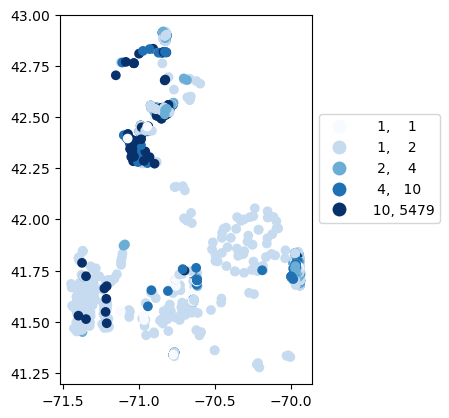

In [38]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(temperature_results, stations_clipped)
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

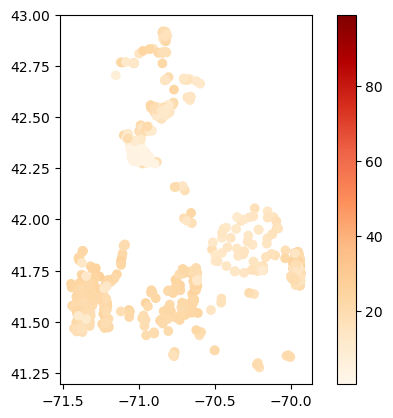

In [39]:
# Map average results at each station
gdf_avg = visualize.map_measure(temperature_results, stations_clipped, 'Temperature')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)

##### Dissolved Oxygen (DO)

In [40]:
# look at Dissolved oxygen (DO), but this time without intermediate fields
df = harmonize.harmonize_generic(df, 'Dissolved oxygen (DO)')

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


Note: Imediately when we run a harmonization function without the intermediate fields they're deleted.

In [41]:
# Look at what was changed
cols = ['MonitoringLocationIdentifier', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'DO']
do_res = df.loc[df['CharacteristicName']=='Dissolved oxygen (DO)', cols]
do_res

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,DO
3,IRWA-HB,4.6,mg/L,NaN,4.6 milligram / liter
6,MYRWA-MEB001,9.4,mg/L,NaN,9.4 milligram / liter
7,NARS_WQX-MARO-1020,10.3,mg/L,NaN,10.3 milligram / liter
9,MASSDEP-W2412,8.7,mg/L,NaN,8.7 milligram / liter
11,MERRIMACK_RIVER_WATERSHED_WQX-Central Catholic,10.91,mg/L,NaN,10.91 milligram / liter
...,...,...,...,...,...
329859,11NPSWRD_WQX-CACO_GREAT_W,6.1,mg/L,NaN,6.1 milligram / liter
329862,11NPSWRD_WQX-SAMA_EPG_SHC,14.2,mg/L,NaN,14.2 milligram / liter
329863,11NPSWRD_WQX-SAMA_EPG_SHD,8.5,mg/L,NaN,8.5 milligram / liter
329869,11NPSWRD_WQX-SAMA_EPG_SHC,9.1,mg/L,NaN,9.1 milligram / liter


In [42]:
do_res.loc[do_res['ResultMeasure/MeasureUnitCode']!='mg/l']

,MonitoringLocationIdentifier,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,DO
3,IRWA-HB,4.6,mg/L,NaN,4.6 milligram / liter
6,MYRWA-MEB001,9.4,mg/L,NaN,9.4 milligram / liter
7,NARS_WQX-MARO-1020,10.3,mg/L,NaN,10.3 milligram / liter
9,MASSDEP-W2412,8.7,mg/L,NaN,8.7 milligram / liter
11,MERRIMACK_RIVER_WATERSHED_WQX-Central Catholic,10.91,mg/L,NaN,10.91 milligram / liter
...,...,...,...,...,...
329859,11NPSWRD_WQX-CACO_GREAT_W,6.1,mg/L,NaN,6.1 milligram / liter
329862,11NPSWRD_WQX-SAMA_EPG_SHC,14.2,mg/L,NaN,14.2 milligram / liter
329863,11NPSWRD_WQX-SAMA_EPG_SHD,8.5,mg/L,NaN,8.5 milligram / liter
329869,11NPSWRD_WQX-SAMA_EPG_SHC,9.1,mg/L,NaN,9.1 milligram / liter


Though there were no results in %, the conversion from percent saturation (%) to mg/l is special. This equation is being improved by integrating tempertaure and pressure instead of assuming STP (see DO_saturation())

In [43]:
# Aggregate data by station
visualize.station_summary(do_res, 'DO')

,MonitoringLocationIdentifier,cnt,mean
0,11113300-00F-KLY,3,4.040000
1,11113300-01-BAK,10,5.697000
2,11113300-01-BVR,1,6.700000
3,11113300-01-CTP,37,6.945135
4,11113300-01-GOL,1,4.400000
...,...,...,...
2219,OARS-SUD-096,54,5.334815
2220,OARS-SUD-098,14,6.037143
2221,OARS-SUD-144,94,9.201277
2222,OARS-SUD-236,6,7.331667


<Axes: >

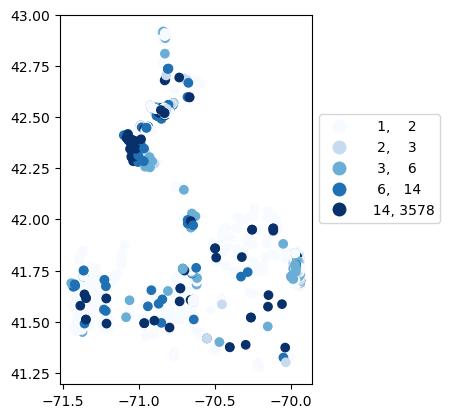

In [44]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(do_res, stations_clipped)
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

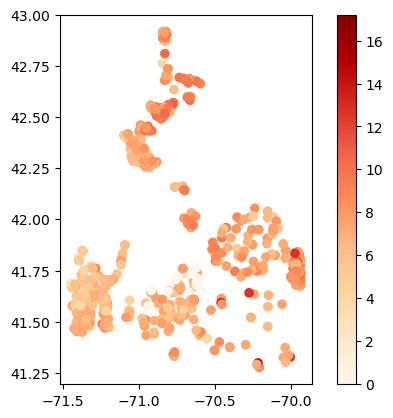

In [45]:
# Map average results at each station
gdf_avg = visualize.map_measure(do_res, stations_clipped, 'DO')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)

##### pH

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


-Usable results-
count    65273.000000
mean         6.371467
std          3.103471
min         -3.124705
25%          5.410000
50%          6.500000
75%          7.200000
max        715.000000
dtype: float64
Unusable results: 17
Usable results with inferred units: 215
Results outside threshold (0.0 to 24.992293265069325): 12


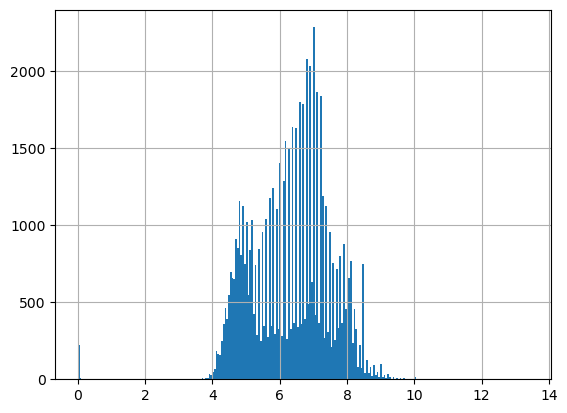

In [46]:
# pH, this time looking at a report
df = harmonize.harmonize_generic(df, 'pH', report=True)

Note the warnings that occur when a unit is not recognized by the package. These occur even when report=False. Future versions could include these as defined units for pH, but here it wouldn't alter results.

In [47]:
df.loc[df['CharacteristicName']=='pH', ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'pH']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,pH
27,7.78,None,NaN,7.78 dimensionless
51,7.9,None,NaN,7.9 dimensionless
57,7.69,None,NaN,7.69 dimensionless
58,6.16,None,NaN,6.16 dimensionless
60,7.4,None,NaN,7.4 dimensionless
...,...,...,...,...
334667,7.3,std units,NaN,7.3 dimensionless
334674,7.5,std units,NaN,7.5 dimensionless
334677,7.3,std units,NaN,7.3 dimensionless
334682,7.1,std units,NaN,7.1 dimensionless


'None' is uninterpretable and replaced with NaN, which then gets replaced with 'dimensionless' since pH is unitless

##### Salinity

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\basis.py:95: UserWarning: Mismatched ResultTemperatureBasisText: updated from 25 deg C to @25C (units)
  warn('Mismatched {}'.format(flag))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'deg C' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))


-Usable results-
count    22416.000000
mean        18.304686
std         30.855742
min          0.000000
25%          0.480000
50%         28.800000
75%         31.310000
max       4003.482834
dtype: float64
Unusable results: 217
Usable results with inferred units: 1
Results outside threshold (0.0 to 203.4391351174837): 2


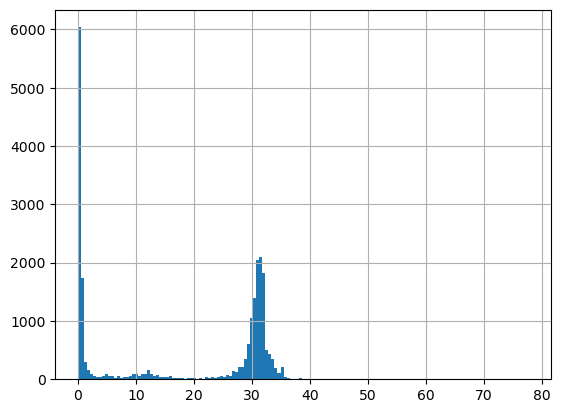

In [48]:
# Salinity
df = harmonize.harmonize_generic(df, 'Salinity', report=True, errors='ignore')

In [49]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Salinity']
df.loc[df['CharacteristicName']=='Salinity', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity
21,33.3,ppth,NaN,33.3 Practical_Salinity_Units
48,32.7,ppth,NaN,32.7 Practical_Salinity_Units
86,30.48,ppt,NaN,30.48 Practical_Salinity_Units
94,0.21,ppth,NaN,0.21 Practical_Salinity_Units
96,12.3,ppth,NaN,12.3 Practical_Salinity_Units
...,...,...,...,...
334620,4.2,PSU,NaN,4.2 Practical_Salinity_Units
334624,0.5,PSU,NaN,0.5 Practical_Salinity_Units
334630,0.2,PSU,NaN,0.2 Practical_Salinity_Units
334639,4.4,PSU,NaN,4.4 Practical_Salinity_Units


##### Nitrogen

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'cm3/g' UNDEFINED UNIT for Nitrogen
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\construction.py:616: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(data, copy=copy)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


-Usable results-
count    2308.000000
mean        6.732985
std       109.238447
min         0.000800
25%         0.075000
50%         0.241182
75%         1.009865
max      2800.000000
dtype: float64
Unusable results: 206
Usable results with inferred units: 0
Results outside threshold (0.0 to 662.1636690906354): 6


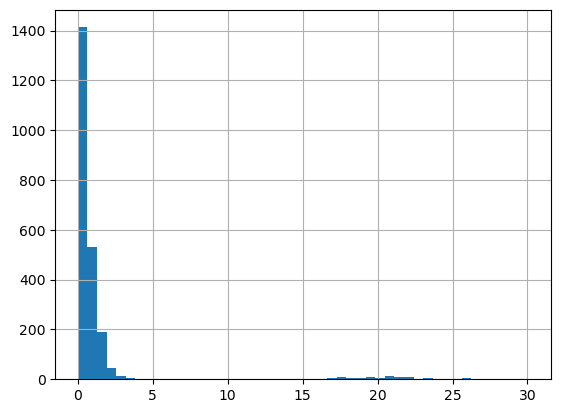

In [50]:
# Nitrogen
df = harmonize.harmonize_generic(df, 'Nitrogen', report=True)

In [51]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Nitrogen']
df.loc[df['CharacteristicName']=='Nitrogen', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Nitrogen
633,0.926976,mg/L,NaN,0.926976 milligram / liter
734,1.571196,mg/L,NaN,1.571196 milligram / liter
740,0.816144,mg/L,NaN,0.816144 milligram / liter
993,0.848832,mg/L,NaN,0.848832 milligram / liter
1037,0.770448,mg/L,NaN,0.770448 milligram / liter
...,...,...,...,...
334592,0.06,mg/l,NaN,0.06 milligram / liter
334602,0.09,mg/l,NaN,0.09 milligram / liter
334627,0.065,mg/l,NaN,0.065 milligram / liter
334669,0.103,mg/l,NaN,0.103 milligram / liter


##### Conductivity

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'count' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))


-Usable results-
count     1658.000000
mean      1165.048774
std       3717.317493
min          0.000000
25%        325.000000
50%        448.500000
75%        591.750000
max      39960.000000
dtype: float64
Unusable results: 80
Usable results with inferred units: 0
Results outside threshold (0.0 to 23468.953729993682): 19


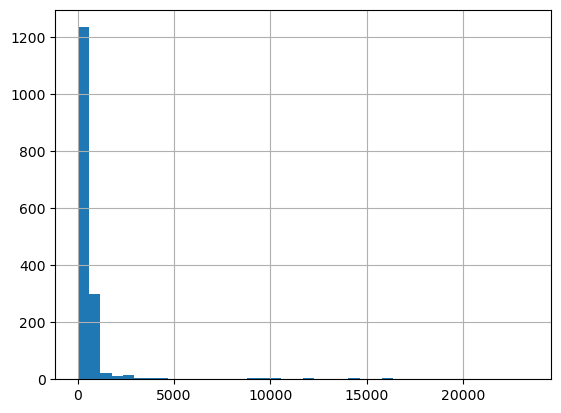

In [52]:
# Conductivity
df = harmonize.harmonize_generic(df, 'Conductivity', report=True, errors='ignore')

In [53]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Conductivity']
df.loc[df['CharacteristicName']=='Conductivity', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Conductivity
18,349,uS/cm,NaN,349.0 microsiemens / centimeter
22,8,count,NaN,NaN
35,443,uS/cm,NaN,443.0 microsiemens / centimeter
42,67.11703531,uS/cm,NaN,67.11703531 microsiemens / centimeter
65,590,uS/cm,NaN,590.0 microsiemens / centimeter
...,...,...,...,...
169023,444,uS/cm,NaN,444.0 microsiemens / centimeter
169722,441,uS/cm,NaN,441.0 microsiemens / centimeter
170118,1.5,uS/cm,NaN,1.5 microsiemens / centimeter
170487,296,uS/cm,NaN,296.0 microsiemens / centimeter


##### Chlorophyll a

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'ppb' UNDEFINED UNIT for Chlorophyll
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'ug/cm2' UNDEFINED UNIT for Chlorophyll
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'ug/m3' UNDEFINED UNIT for Chlorophyll
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


-Usable results-
count    3937.000000
mean        0.616088
std         3.373726
min        -0.002400
25%         0.001930
50%         0.005600
75%         0.020900
max        92.900000
dtype: float64
Unusable results: 198
Usable results with inferred units: 9
Results outside threshold (0.0 to 20.85844651100984): 29


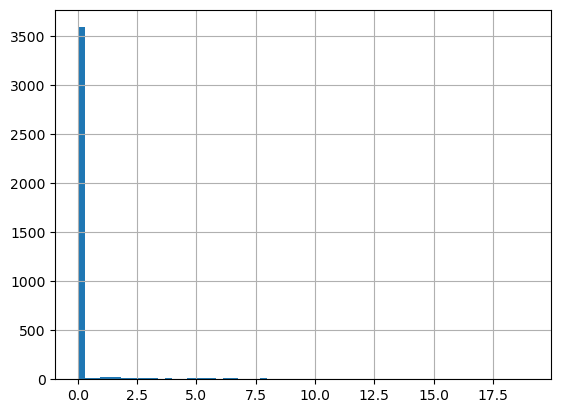

In [54]:
# Chlorophyll a
df = harmonize.harmonize_generic(df, 'Chlorophyll a', report=True)

In [55]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Chlorophyll']
df.loc[df['CharacteristicName']=='Chlorophyll a', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Chlorophyll
2,4.0,mg/m3,NaN,0.004000000000000001 milligram / liter
178,5.50,ug/L,NaN,0.0055 milligram / liter
332,9.48,ug/L,NaN,0.00948 milligram / liter
572,3.0,mg/m3,NaN,0.003000000000000001 milligram / liter
760,NaN,mg/m3,ResultMeasureValue: missing (NaN) result,NaN
...,...,...,...,...
334635,0.6,ug/l,NaN,0.0006 milligram / liter
334644,1.3,ug/l,NaN,0.0013000000000000002 milligram / liter
334672,2.9,ug/l,NaN,0.0029 milligram / liter
334680,3.2,ug/l,NaN,0.0032 milligram / liter


##### Organic Carbon

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


-Usable results-
count      5921.000000
mean       5396.039161
std       36234.333007
min      -90000.000000
25%           1.600000
50%           4.820000
75%           8.750000
max      530000.000000
dtype: float64
Unusable results: 79
Usable results with inferred units: 0
Results outside threshold (0.0 to 222802.0372015339): 40


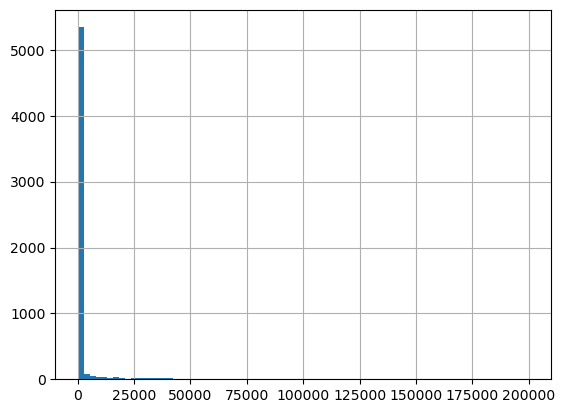

In [56]:
# Organic carbon (%)
df = harmonize.harmonize_generic(df, 'Organic carbon', report=True)

In [57]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Carbon']
df.loc[df['CharacteristicName']=='Organic carbon', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Carbon
815,7.05,mg/L,NaN,7.05 milligram / liter
923,7.57,mg/L,NaN,7.57 milligram / liter
949,3.5,mg/L,NaN,3.5 milligram / liter
2476,3.8,mg/L,NaN,3.8 milligram / liter
3196,3.7,mg/L,NaN,3.7 milligram / liter
...,...,...,...,...
334566,4.77,mg/l,NaN,4.77 milligram / liter
334580,8.76,mg/l,NaN,8.76 milligram / liter
334591,4.83,mg/l,NaN,4.83 milligram / liter
334668,8.6,mg/l,NaN,8.6 milligram / liter


##### Turbidity (NTU)

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:922: UserWarning: Bad Turbidity unit: count
  warn('Bad Turbidity unit: {}'.format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'count' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))


-Usable results-
count    22531.000000
mean        21.593737
std         88.247091
min       -999.000000
25%          1.400000
50%          2.830000
75%          5.630000
max       4100.000000
dtype: float64
Unusable results: 547
Usable results with inferred units: 275
Results outside threshold (0.0 to 551.0762841270599): 146


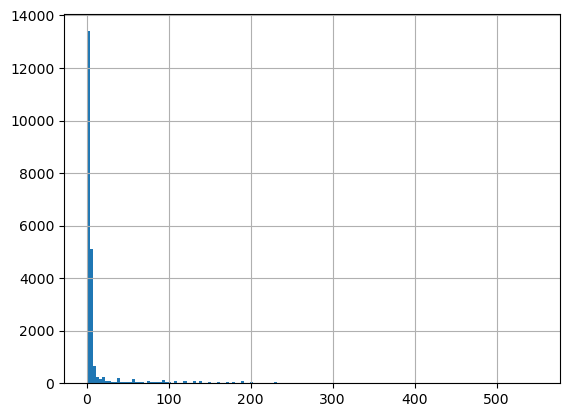

In [58]:
# Turbidity (NTU)
df = harmonize.harmonize_generic(df, 'Turbidity', report=True, errors='ignore')

In [59]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Turbidity']
df.loc[df['CharacteristicName']=='Turbidity', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Turbidity
1,4.2,NTU,NaN,4.2 Nephelometric_Turbidity_Units
5,1.3,NTU,NaN,1.3 Nephelometric_Turbidity_Units
10,7.9,NTU,NaN,7.9 Nephelometric_Turbidity_Units
20,1.5,NTU,NaN,1.5 Nephelometric_Turbidity_Units
24,2.1,NTU,NaN,2.1 Nephelometric_Turbidity_Units
...,...,...,...,...
334671,5.9,NTRU,NaN,5.9 Nephelometric_Turbidity_Units
334675,4.0,NTRU,NaN,4.0 Nephelometric_Turbidity_Units
334679,1.7,NTRU,NaN,1.7 Nephelometric_Turbidity_Units
334683,8.0,NTRU,NaN,8.0 Nephelometric_Turbidity_Units


##### Sediment

In [60]:
# Sediment
df = harmonize.harmonize_generic(df, 'Sediment', report=False, errors='ignore')

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'g / H2O' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


In [61]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Sediment']
df.loc[df['CharacteristicName']=='Sediment', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Sediment
286466,39.0,%,NaN,390.0 gram / kilogram
286853,33.0,%,NaN,330.0 gram / kilogram
291434,0.012,g,NaN,NaN
291435,0.0037,g,NaN,NaN
291436,0.0048,g,NaN,NaN
...,...,...,...,...
332222,0.0012,g,NaN,NaN
332250,0.0033,g,NaN,NaN
332289,0.0013,g,NaN,NaN
332360,0.0043,g,NaN,NaN


##### Phosphorus

Note: must be merged w/ activities (package runs query by site if not already merged)

In [62]:
# Phosphorus
df = harmonize.harmonize_generic(df, 'Phosphorus')

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\construction.py:616: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(data, copy=copy)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


Note: warnings for unexpected characteristic fractions. Fractions are each seperated out into their own result column.

In [63]:
# All Phosphorus
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'TDP_Phosphorus']
df.loc[df['Phosphorus'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
26,0.024,mg/L,NaN,NaN
29,0.05,mg/L,NaN,NaN
37,0.027,mg/L,NaN,NaN
45,0.059712,mg/L,NaN,NaN
91,0.049,mg/L,NaN,NaN
...,...,...,...,...
334550,0.006,mg/l as P,NaN,0.006 milligram / liter
334564,0.016,mg/l as P,NaN,NaN
334565,0.008,mg/l as P,NaN,0.008 milligram / liter
334572,0.047,mg/l as P,NaN,NaN


In [64]:
# Total phosphorus
df.loc[df['TP_Phosphorus'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
26,0.024,mg/L,NaN,NaN
29,0.05,mg/L,NaN,NaN
37,0.027,mg/L,NaN,NaN
45,0.059712,mg/L,NaN,NaN
91,0.049,mg/L,NaN,NaN
...,...,...,...,...
334524,0.036,mg/l as P,NaN,NaN
334534,0.021,mg/l as P,NaN,NaN
334549,0.011,mg/l as P,NaN,NaN
334564,0.016,mg/l as P,NaN,NaN


In [65]:
# Total dissolved phosphorus
df.loc[df['TDP_Phosphorus'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
38804,0.023,ppm,NaN,0.023000000000000003 milligram / liter
40702,0.035,ppm,NaN,0.03500000000000001 milligram / liter
41617,0.017,ppm,NaN,0.017000000000000005 milligram / liter
41699,0.015,ppm,NaN,0.015000000000000003 milligram / liter
42388,0.015,ppm,NaN,0.015000000000000003 milligram / liter
...,...,...,...,...
334525,0.015,mg/l as P,NaN,0.015 milligram / liter
334535,0.005,mg/l as P,NaN,0.005 milligram / liter
334550,0.006,mg/l as P,NaN,0.006 milligram / liter
334565,0.008,mg/l as P,NaN,0.008 milligram / liter


In [66]:
# All other phosphorus sample fractions
df.loc[df['Other_Phosphorus'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
28193,0.03525375,mg/L,NaN,NaN
28299,0.107028125,mg/L,NaN,NaN
28822,0.0697675,mg/L,NaN,NaN
29036,0.04356,mg/L,NaN,NaN
29179,0.03654875,mg/L,NaN,NaN
...,...,...,...,...
325511,74.0,mg/kg as P,NaN,NaN
325512,142.0,mg/kg as P,NaN,NaN
325595,390.0,mg/kg,NaN,NaN
325596,107.0,mg/kg as P,NaN,NaN


##### Bacteria

Some equivalence assumptions are built-in where bacteria counts that are not equivalent are treated as such because there is no standard way to convert from one to another.

###### Fecal Coliform

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'MPN/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'cfu/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'CFU/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))


-Usable results-
count      2462.000000
mean        910.512591
std        6103.365912
min           0.000000
25%          24.000000
50%          93.000000
75%         400.000000
max      250000.000000
dtype: float64
Unusable results: 5122
Usable results with inferred units: 1
Results outside threshold (0.0 to 37530.70806108734): 7


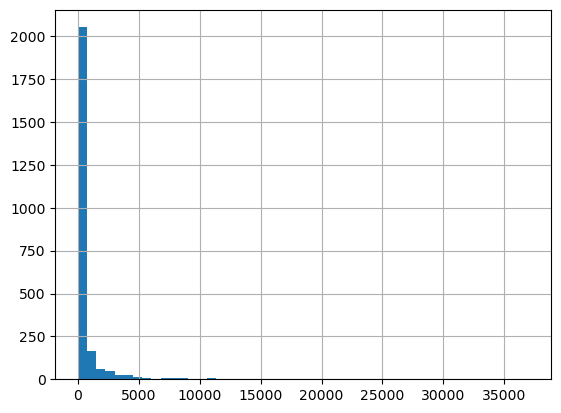

In [67]:
# Known unit with bad dimensionality ('Colony_Forming_Units * milliliter')
df = harmonize.harmonize_generic(df, 'Fecal Coliform', report=True, errors='ignore')

In [68]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Fecal_Coliform']
df.loc[df['CharacteristicName']=='Fecal Coliform', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Fecal_Coliform
7981,40,#/100mL,NaN,NaN
8039,9,#/100mL,NaN,NaN
8048,20,#/100mL,NaN,NaN
8190,200,#/100mL,NaN,NaN
8353,NO DATA,#/100mL,"ResultMeasureValue: ""NO DATA"" result cannot be...",NaN
...,...,...,...,...
329215,2400.0,cfu/100mL,NaN,NaN
329217,230.0,cfu/100mL,NaN,NaN
329221,30.0,cfu/100mL,NaN,NaN
329226,NaN,cfu/100mL,ResultMeasureValue: missing (NaN) result,NaN


###### Excherichia Coli

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'MPN/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: '%' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'cfu/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.p

-Usable results-
count     1204.000000
mean       650.276802
std       3564.619797
min          0.000000
25%         22.000000
50%         67.000000
75%        220.000000
max      72000.000000
dtype: float64
Unusable results: 20835
Usable results with inferred units: 0
Results outside threshold (0.0 to 22037.995585055916): 7


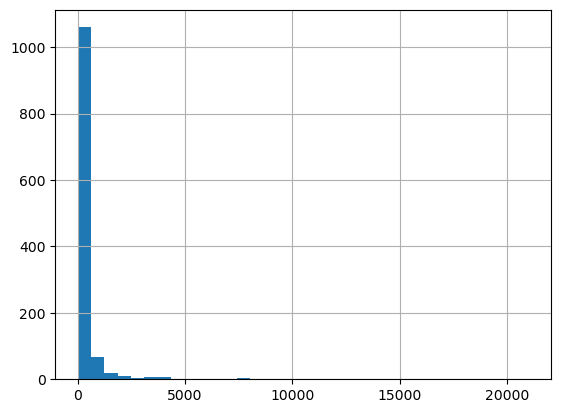

In [69]:
# Known unit with bad dimensionality ('Colony_Forming_Units * milliliter')
df = harmonize.harmonize_generic(df, 'Escherichia coli', report=True, errors='ignore')

In [70]:
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'E_coli']
df.loc[df['CharacteristicName']=='Escherichia coli', cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,E_coli
4,96,MPN/100mL,NaN,NaN
13,24200,MPN/100mL,NaN,NaN
16,110,MPN/100mL,NaN,NaN
19,52,MPN/100mL,NaN,NaN
23,52,MPN/100mL,NaN,NaN
...,...,...,...,...
334642,280.0,MPN/100 ml,NaN,280.0 Colony_Forming_Units / milliliter
334664,59.0,MPN/100 ml,NaN,59.0 Colony_Forming_Units / milliliter
334670,1100.0,MPN/100 ml,NaN,1100.0 Colony_Forming_Units / milliliter
334678,37.0,MPN/100 ml,NaN,37.0 Colony_Forming_Units / milliliter


#### Combining Salinity and Conductivity

Convert module has various functions to convert from one unit or characteristic to another. Some of these are used within a single characteristic during harmonization (e.g. DO saturation to concentration) while others are intended to model one characteristic as an indicator of another (e.g. estimate salinity from conductivity).

Note: this should only be done after both characteristic fields have been harmonized. Results before and after should be inspected, thresholds for outliers applied, and consider adding a QA_flag for modeled data.

Explore Salinity results:

In [71]:
from harmonize_wq import convert

In [72]:
# First note initial Salinity info
lst = [x.magnitude for x in list(df['Salinity'].dropna())]
q_sum = sum(lst)
print('Range: {} to {}'.format(min(lst), max(lst)))
print('Results: {} \nMean: {} PSU'.format(len(lst), q_sum/len(lst)))

Range: 0.0 to 4003.4828342857154
Results: 22416 
Mean: 18.304686015904952 PSU


In [73]:
# Identify extreme outliers
[x for x in lst if x >3200]

[4003.4828342857154]

Other fields like units and QA_flag may help understand what caused high values and what results might need to be dropped from consideration

In [74]:
# Columns to focus on
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Salinity']

In [75]:
# Look at important fields for max 5 values
salinity_series = df['Salinity'][df['Salinity'].notna()]
salinity_series.sort_values(ascending=False, inplace=True)
df[cols][df['Salinity'].isin(salinity_series[0:5])]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity
14395,804,ppth,NaN,804.0 Practical_Salinity_Units
117412,71.49,ppth,NaN,71.49 Practical_Salinity_Units
118421,70.62,ppth,NaN,70.62 Practical_Salinity_Units
165400,77.6666666666667,ppt,NaN,77.6666666666667 Practical_Salinity_Units
305919,4980.0,mg/mL @25C,ResultTemperatureBasisText: updated from 25 de...,4003.4828342857154 Practical_Salinity_Units


Detection limits may help understand what caused low values and what results might need to be dropped or updated

In [76]:
df = wrangle.add_detection(df, 'Salinity')
cols+=['ResultDetectionConditionText',
       'DetectionQuantitationLimitTypeName',
       'DetectionQuantitationLimitMeasure/MeasureValue',
       'DetectionQuantitationLimitMeasure/MeasureUnitCode']

In [77]:
# Look at important fields for min 5 values (often multiple 0.0)
df[cols][df['Salinity'].isin(salinity_series[-5:])]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity,ResultDetectionConditionText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode
11167,0,PSS,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
11342,0,PSS,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
15245,0,PSS,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
22686,0,ppm,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
23883,0,ppm,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
251311,0.0,ppth,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
251374,0.0,ppth,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
251409,0.0,ppth,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN
251413,0.0,ppth,NaN,0.0 Practical_Salinity_Units,NaN,NaN,NaN,NaN


Explore conductivity results:

In [78]:
# Create series for Conductivity values
cond_series = df['Conductivity'].dropna()
cond_series

18              349.0 microsiemens / centimeter
35              443.0 microsiemens / centimeter
42        67.11703531 microsiemens / centimeter
65              590.0 microsiemens / centimeter
107           418.375 microsiemens / centimeter
                          ...                  
169023          444.0 microsiemens / centimeter
169722          441.0 microsiemens / centimeter
170118            1.5 microsiemens / centimeter
170487          296.0 microsiemens / centimeter
170498          442.0 microsiemens / centimeter
Name: Conductivity, Length: 1658, dtype: object

Conductivity thresholds from Freshwater Explorer: 10 > x < 5000 us/cm, use a higher threshold for coastal waters

In [79]:
# Sort and check other relevant columns before converting (e.g. Salinity)
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'Salinity', 'Conductivity']
df.sort_values(by=['Conductivity'], ascending=False, inplace=True)
df.loc[df['Conductivity'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity,Conductivity
61238,39960,uS/cm,NaN,NaN,39960.0 microsiemens / centimeter
59687,33604,uS/cm,NaN,NaN,33604.0 microsiemens / centimeter
24381,30886,uS/cm,NaN,NaN,30886.0 microsiemens / centimeter
23213,30788,uS/cm,NaN,NaN,30788.0 microsiemens / centimeter
25877,30518,uS/cm,NaN,NaN,30518.0 microsiemens / centimeter
...,...,...,...,...,...
4902,0.03,uS/cm,NaN,NaN,0.03 microsiemens / centimeter
5142,0.02,uS/cm,NaN,NaN,0.02 microsiemens / centimeter
2662,0.02,uS/cm,NaN,NaN,0.02 microsiemens / centimeter
3068,0,uS/cm,NaN,NaN,0.0 microsiemens / centimeter


In [80]:
# Convert values to PSU and write to Salinity
cond_series = cond_series.apply(str)  # Convert to string to convert to dimensionless (PSU)
df.loc[df['Conductivity'].notna(), 'Salinity'] = cond_series.apply(convert.conductivity_to_PSU)
df.loc[df['Conductivity'].notna(), 'Salinity']

61238    25.494 dimensionless
59687    21.046 dimensionless
24381    19.177 dimensionless
23213     19.11 dimensionless
25877    18.926 dimensionless
                 ...         
4902      0.012 dimensionless
5142      0.012 dimensionless
2662      0.012 dimensionless
3068      0.012 dimensionless
6534      0.012 dimensionless
Name: Salinity, Length: 1658, dtype: object

#### Datetime

datetime() formats time using dataretrieval and ActivityStart

In [81]:
# First inspect the existing unformated fields
cols = ['ActivityStartDate', 'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode']
df[cols]

,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode
61238,2015-09-11,00:15:00,EST
59687,2015-09-11,00:30:00,EST
24381,2014-11-01,18:00:00,EST
23213,2014-11-01,18:15:00,EST
25877,2014-11-01,17:45:00,EST
...,...,...,...
334686,2023-07-05,10:30:00,EDT
334687,2023-07-05,10:30:00,EDT
334688,2023-07-05,10:30:00,EDT
334689,2023-07-05,10:30:00,EDT


In [82]:
# 'ActivityStartDate' presserves date where 'Activity_datetime' is NAT due to no time zone
df = clean.datetime(df)
df[['ActivityStartDate', 'Activity_datetime']]

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\dataretrieval\utils.py:87: UserWarning: Warning: 104530 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


,ActivityStartDate,Activity_datetime
61238,2015-09-11,2015-09-11 05:15:00+00:00
59687,2015-09-11,2015-09-11 05:30:00+00:00
24381,2014-11-01,2014-11-01 23:00:00+00:00
23213,2014-11-01,2014-11-01 23:15:00+00:00
25877,2014-11-01,2014-11-01 22:45:00+00:00
...,...,...
334686,2023-07-05,2023-07-05 14:30:00+00:00
334687,2023-07-05,2023-07-05 14:30:00+00:00
334688,2023-07-05,2023-07-05 14:30:00+00:00
334689,2023-07-05,2023-07-05 14:30:00+00:00


Activity_datetime combines all three time component columns into UTC. If time is missing this is NaT so a ActivityStartDate column is used to preserve date only.

#### Depth

Note: Data are often lacking sample depth metadata

In [83]:
# Depth of sample (default units='meter')
df = clean.harmonize_depth(df)
#df.loc[df['ResultDepthHeightMeasure/MeasureValue'].dropna(), "Depth"]
df['ResultDepthHeightMeasure/MeasureValue'].dropna()

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


80925      1.0
78201      0.5
80257      1.2
75696      0.0
81494      3.7
          ... 
108557     2.0
108878    32.0
131516    17.0
136694     2.0
137232     2.0
Name: ResultDepthHeightMeasure/MeasureValue, Length: 1942, dtype: float64

#### Characteristic to Column (long to wide format)

In [84]:
# Split single QA column into multiple by characteristic (rename the result to preserve these QA_flags)
df2 = wrangle.split_col(df)
df2

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,QA_Sediment,QA_Nitrogen,QA_Chlorophyll,QA_TP_Phosphorus,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Temperature,QA_DO,QA_E_coli,QA_Carbon
61238,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_9/11/2015 00:15,2015-09-11,00:15:00,-0500,CRWA-CrescentPost,STORET-478270434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59687,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_9/11/2015 00:30,2015-09-11,00:30:00,-0500,CRWA-CrescentPost,STORET-478270439,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24381,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 18:00,2014-11-01,18:00:00,-0500,CRWA-CrescentPost,STORET-398089476,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23213,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 18:15,2014-11-01,18:15:00,-0500,CRWA-CrescentPost,STORET-398089480,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25877,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 17:45,2014-11-01,17:45:00,-0500,CRWA-CrescentPost,STORET-398089472,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334687,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334688,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334689,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708077,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# This expands the single col (QA_flag) out to a number of new columns based on the unique characteristicNames and speciation
print('{} new columns'.format(len(df2.columns) - len(df.columns)))

15 new columns


In [86]:
# Note: there are fewer rows because NAN results are also dropped in this step
print('{} fewer rows'.format(len(df)-len(df2)))

33820 fewer rows


In [87]:
#Examine Carbon flags from earlier in notebook (note these are empty now because NAN is dropped)
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'Carbon', 'QA_Carbon']
df2.loc[df2['QA_Carbon'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,Carbon,QA_Carbon


Next the table is divided into the columns of interest (main_df) and characteristic specific metadata (chars_df)

In [88]:
# split table into main and characteristics tables
main_df, chars_df = wrangle.split_table(df2)

In [89]:
# Columns still in main table
main_df.columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'MonitoringLocationIdentifier', 'ProviderName',
       'Secchi', 'Temperature', 'DO', 'pH', 'Salinity', 'Nitrogen',
       'Speciation', 'Conductivity', 'Chlorophyll', 'Carbon', 'Turbidity',
       'Sediment', 'Phosphorus', 'TP_Phosphorus', 'TDP_Phosphorus',
       'Other_Phosphorus', 'Fecal_Coliform', 'E_coli',
       'DetectionQuantitationLimitTypeName',
       'DetectionQuantitationLimitMeasure/MeasureValue',
       'DetectionQuantitationLimitMeasure/MeasureUnitCode',
       'Activity_datetime', 'Depth', 'QA_Secchi', 'QA_Turbidity', 'QA_pH',
       'QA_Fecal_Coliform', 'QA_Salinity', 'QA_Conductivity', 'QA_Sediment',
       'QA_Nitrogen', 'QA_Chlorophyll', 'QA_TP_Phosphorus',
       'QA_TDP_Phosphorus', 'QA_Other_Phosphorus', 'QA_Temperature', 'QA_DO',
       'QA_E_coli', 'QA_Carbon'],
      dtype='object')

In [90]:
# look at main table results (first 5)
main_df.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,MonitoringLocationIdentifier,ProviderName,Secchi,Temperature,DO,pH,Salinity,...,QA_Sediment,QA_Nitrogen,QA_Chlorophyll,QA_TP_Phosphorus,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Temperature,QA_DO,QA_E_coli,QA_Carbon
61238,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_9/11/2015 00:15,CRWA-CrescentPost,STORET,NaN,NaN,NaN,NaN,25.494 dimensionless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59687,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_9/11/2015 00:30,CRWA-CrescentPost,STORET,NaN,NaN,NaN,NaN,21.046 dimensionless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24381,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 18:00,CRWA-CrescentPost,STORET,NaN,NaN,NaN,NaN,19.177 dimensionless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23213,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 18:15,CRWA-CrescentPost,STORET,NaN,NaN,NaN,NaN,19.11 dimensionless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25877,CRWA,Charles River Watershed Association (Massachus...,CRWA-Stormwater_11/01/2014 17:45,CRWA-CrescentPost,STORET,NaN,NaN,NaN,NaN,18.926 dimensionless,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Empty columns that could be dropped (Mostly QA columns)
cols = list(main_df.columns)
x = main_df.dropna(axis=1, how='all')
[col for col in cols if col not in x.columns]

['DetectionQuantitationLimitTypeName',
 'DetectionQuantitationLimitMeasure/MeasureValue',
 'DetectionQuantitationLimitMeasure/MeasureUnitCode',
 'QA_Conductivity',
 'QA_Sediment',
 'QA_TDP_Phosphorus',
 'QA_DO',
 'QA_E_coli',
 'QA_Carbon']

<Axes: >

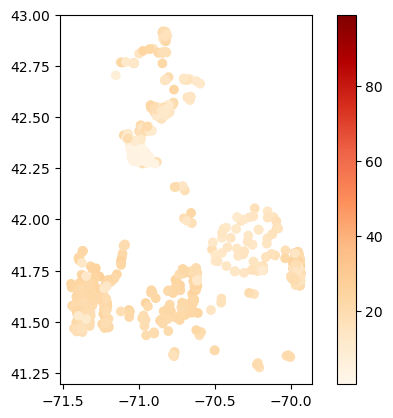

In [92]:
# Map average results at each station
gdf_avg = visualize.map_measure(main_df, stations_clipped, 'Temperature')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)